<a href="https://colab.research.google.com/github/OtabekRustamov/Face_Maks_Detector/blob/main/face_mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/data.zip" -d "/content/gdrive/My Drive/"

Archive:  /content/gdrive/My Drive/data.zip
replace /content/gdrive/My Drive/data/with_mask/0-with-mask.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y]
  inflating: /content/gdrive/My Drive/data/with_mask/0-with-mask.jpg  
replace /content/gdrive/My Drive/data/with_mask/100-with-mask.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/gdrive/My Drive/data/with_mask/100-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/101-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/103-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/104-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/105-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/106-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/107-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/108-with-mask.jpg  
  inflating: /content/gdrive/My Drive/data/with_mask/109-with-mask.jpg  
  inflating: /c

In [ ]:
import os
import cv2


data_path = "/content/gdrive/My Drive/data"

catigories = ["with_mask","without_mask"]

labels = [i for i in range(len(catigories))]
label_dict = dict(zip(catigories,labels))

print(catigories)
print(labels)
print(label_dict)

['with_mask', 'without_mask']
[0, 1]
{'with_mask': 0, 'without_mask': 1}


In [ ]:
img_size = 100
data = []
target = []

for catigory in catigories:
    folder_path = os.path.join(data_path,catigory)
    # print(folder_path)
    img_names = os.listdir(folder_path)
    # print(img_names)

    for img_name in img_names:
        img = cv2.imread(os.path.join(folder_path,img_name))
        
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
        resized = cv2.resize(gray,(img_size,img_size))  
        data.append(resized)
        target.append(label_dict[catigory])
          

In [ ]:
import numpy as np

data=np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history = model.fit(
    train_data,
    train_target,
    epochs=15,
    callbacks=[checkpoint],
    validation_split=0.2
)

Epoch 1/15
31/31 [==============================] - 19s 570ms/step - loss: 0.6892 - acc: 0.5316 - val_loss: 0.6491 - val_acc: 0.6613
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/15
31/31 [==============================] - 17s 563ms/step - loss: 0.6560 - acc: 0.6371 - val_loss: 0.5919 - val_acc: 0.6532
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/15
31/31 [==============================] - 17s 564ms/step - loss: 0.6041 - acc: 0.6825 - val_loss: 0.5315 - val_acc: 0.8266
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/15
31/31 [==============================] - 17s 563ms/step - loss: 0.5498 - acc: 0.7328 - val_loss: 0.4789 - val_acc: 0.7702
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/15
31/31 [==============================] - 17s 565ms/step - loss: 0.4922 - acc: 0.7815 - val_loss: 0.4376 - val_acc: 0.8629
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/15
31/31 [===========================

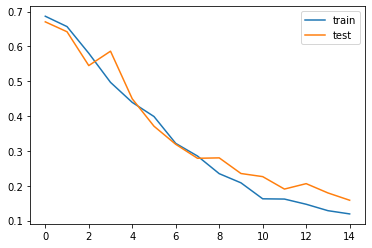

In [ ]:

from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

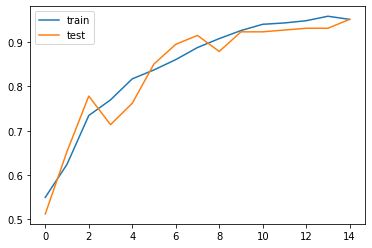

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 18ms/step - loss: 0.1725 - acc: 0.9348
[0.1724681258201599, 0.9347826242446899]


In [ ]:
face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/haarcascade_frontalface_default.xml')
path = '/content/gdrive/My Drive/test_image_videos/result_ahad.png'

In [1]:
# import cv2

# import matplotlib.pyplot as plt
# img = cv2.imread(path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure()
# plt.imshow(img)
# plt.show()